In [ ]:
'''
PDB API code
'''

In [48]:
import requests
import pandas as pd

!pwd

/home/ubuntu/MIT/Project


In [49]:
def download_pdb(pdb_id, file_format='pdb', output_dir='.'):
    """
    Download a PDB structure file by PDB ID.

    Parameters:
    pdb_id (str): The PDB ID of the structure to download.
    file_format (str): The file format to download ('pdb', 'cif', etc.).
    save_path (str): The directory where the file will be saved.
    """
    # URL for RCSB PDB file download
    url = f'https://files.rcsb.org/download/{pdb_id}.{file_format}'

    # Send a request to the RCSB PDB server
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        file_path = f"{output_dir}/{pdb_id}.{file_format}"
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {pdb_id} in {file_format} format to {file_path}.")
    else:
        print(f"Failed to download {pdb_id}. Error code: {response.status_code}")

# Example usage:
download_pdb('4HHB', output_dir="./prac_data")  # Hemoglobin

Downloaded 4HHB in pdb format to ./prac_data/4HHB.pdb.


In [64]:
def filter_backbone_atoms(pdb_data, output_name="XXXX", output_dir="/home/ubuntu/MIT/Project/data/pdb_files"):
    """
    Filter the PDB data to include only the backbone atoms (N, CA, C).

    Parameters:
    pdb_data (str): The content of the PDB file as a string.

    Returns:
    str: A string containing only the ATOM records for the backbone atoms.
    """
    backbone_atoms = ['N', 'CA', 'C']  # Backbone atom identifiers
    filtered_data = ""

    # Split the PDB content into lines for processing
    lines = pdb_data.splitlines()

    for line in lines:
        # Check if the line starts with 'ATOM'
        if line.startswith("ATOM"):
            # Extract the atom name and strip any whitespace
            atom_name = line[12:16].strip()

            # If the atom is one of the backbone atoms, add the line to the result
            if atom_name in backbone_atoms:
                filtered_data += line + '\n'

    file_path = f"{output_dir}/{output_name}_backbone.{file_format}"
    with open(file_path, 'w') as file:
        file.write(filtered_data)
    print(f"Downloaded {output_name} in {file_format} format to {file_path}.")

    return filtered_data

# Example usage:
pdb_id = '4HHB'  # Hemoglobin
file_format = 'pdb'
file_path = f'./prac_data/{pdb_id}.{file_format}'

# Read the content of the PDB file
with open(file_path, 'r') as file:
    pdb_content = file.read()

# Filter the content
backbone_data = filter_backbone_atoms(pdb_content, output_name='4HHB', output_dir='./data/pdb_files')

print(backbone_data)


Downloaded 4HHB in pdb format to ./data/pdb_files/4HHB_backbone.pdb.
ATOM      1  N   VAL A   1      19.323  29.727  42.781  1.00 49.05           N  
ATOM      2  CA  VAL A   1      20.141  30.469  42.414  1.00 43.14           C  
ATOM      3  C   VAL A   1      21.664  29.857  42.548  1.00 24.80           C  
ATOM      8  N   LEU A   2      22.284  30.338  41.520  1.00 26.44           N  
ATOM      9  CA  LEU A   2      23.773  29.985  41.873  1.00 26.32           C  
ATOM     10  C   LEU A   2      24.698  31.236  42.725  1.00 32.96           C  
ATOM     16  N   SER A   3      25.002  30.808  43.594  1.00 28.01           N  
ATOM     17  CA  SER A   3      25.913  31.899  44.386  1.00 26.03           C  
ATOM     18  C   SER A   3      26.954  32.120  43.503  1.00 25.99           C  
ATOM     22  N   PRO A   4      28.057  33.118  44.145  1.00 37.49           N  
ATOM     23  CA  PRO A   4      28.906  33.371  43.168  1.00 38.81           C  
ATOM     24  C   PRO A   4      30.214  

In [51]:
def filter_atom_coordinates(pdb_data, include_side_chains=True, output_name="XXXXX", output_dir="/home/ubuntu/MIT/Project/data/pdb_files"):
    """
    Filter the PDB data to include only the ATOM records for the backbone atoms
    or both backbone and side chain atoms.

    Parameters:
    pdb_data (str): The content of the PDB file as a string.
    include_side_chains (bool): Whether to include side chain atoms as well.

    Returns:
    str: A string containing the filtered ATOM records.
    """
    filtered_data = ""
    backbone_atoms = ['N', 'CA', 'C', 'O']  # Include O for the carbonyl oxygen
    
    # Split the PDB content into lines for processing
    lines = pdb_data.splitlines()

    for line in lines:
        # Check if the line starts with 'ATOM'
        if line.startswith("ATOM"):
            atom_name = line[12:16].strip()  # Extract the atom name

            # Check if the atom is a backbone atom or if we're including all atoms
            if atom_name in backbone_atoms or include_side_chains:
                filtered_data += line + '\n'

    file_path = f"{output_dir}/{output_name}_allAtom.{file_format}"
    with open(file_path, 'w') as file:
        file.write(filtered_data)
    print(f"Downloaded {output_name}_allAtom in {file_format} format to {file_path}.")
    
    return filtered_data

# Example usage to extract backbone and side chain atoms
pdb_id = '4HHB'  # Hemoglobin
file_format = 'pdb'
file_path = f'./prac_data/{pdb_id}.{file_format}'

# Read the content of the PDB file
with open(file_path, 'r') as file:
    pdb_content = file.read()

# Filter the content for backbone and side chain atoms
complete_atom_data = filter_atom_coordinates(pdb_content, output_name='4HHB', output_dir='./data/pdb_files', include_side_chains=True)

# Print or write to a file as needed
print(complete_atom_data)


Downloaded 4HHB_allAtom in pdb format to ./data/pdb_files/4HHB_allAtom.pdb.
ATOM      1  N   VAL A   1      19.323  29.727  42.781  1.00 49.05           N  
ATOM      2  CA  VAL A   1      20.141  30.469  42.414  1.00 43.14           C  
ATOM      3  C   VAL A   1      21.664  29.857  42.548  1.00 24.80           C  
ATOM      4  O   VAL A   1      21.985  29.541  43.704  1.00 37.68           O  
ATOM      5  CB  VAL A   1      19.887  31.918  43.524  1.00 72.12           C  
ATOM      6  CG1 VAL A   1      20.656  32.850  42.999  1.00 61.79           C  
ATOM      7  CG2 VAL A   1      18.692  31.583  43.506  1.00 80.12           C  
ATOM      8  N   LEU A   2      22.284  30.338  41.520  1.00 26.44           N  
ATOM      9  CA  LEU A   2      23.773  29.985  41.873  1.00 26.32           C  
ATOM     10  C   LEU A   2      24.698  31.236  42.725  1.00 32.96           C  
ATOM     11  O   LEU A   2      24.359  32.232  42.013  1.00 31.90           O  
ATOM     12  CB  LEU A   2      2

In [58]:
file_path = './data/DATA.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)
print(df.columns.tolist())
column_names = ['PDB','EMDB','Resolution']
df.columns = column_names
print(df.columns.tolist())

['Supplementary Data 1: List of  cases used to train the UNet++ in main-chain probability prediction.', 'Unnamed: 1', 'Unnamed: 2']
['PDB', 'EMDB', 'Resolution']


In [59]:
df.head()

PDB     EMDB      Resolution
0  PDB ID  EMDB ID  Resolution (Å)
1    5OAC     3771               4
2    6BO4     7118               4
3    6BVF     7294               4
4    6CES     7464               4

In [60]:
pdb_list = df["PDB"]
print(pdb_list)

0      PDB ID
1        5OAC
2        6BO4
3        6BVF
4        6CES
        ...  
252      5FUA
253      5VH9
254      6K9K
255      5VHW
256      5FJ6
Name: PDB, Length: 257, dtype: object


In [65]:
# Save required data for each of the PDBs
for id in pdb_list[1:]:
    print(f'Working on {id}')
    data_dir = "./data/full_pdb"
    file_path = f'{data_dir}/{id}.pdb'
    
    download_pdb(id, output_dir=data_dir)
    
    # Read the content of the PDB file
    with open(file_path, 'r') as file:
        pdb_content = file.read()
        filter_backbone_atoms(pdb_content, output_name=id, output_dir='./data/backbones')
        filter_atom_coordinates(pdb_content, output_name=id, output_dir='./data/all_atoms', include_side_chains=True)


    

Working on 5OAC
Downloaded 5OAC in pdb format to ./data/full_pdb/5OAC.pdb.
Downloaded 5OAC in pdb format to ./data/backbones/5OAC_backbone.pdb.
Downloaded 5OAC_allAtom in pdb format to ./data/all_atoms/5OAC_allAtom.pdb.
Working on 6BO4
Downloaded 6BO4 in pdb format to ./data/full_pdb/6BO4.pdb.
Downloaded 6BO4 in pdb format to ./data/backbones/6BO4_backbone.pdb.
Downloaded 6BO4_allAtom in pdb format to ./data/all_atoms/6BO4_allAtom.pdb.
Working on 6BVF
Downloaded 6BVF in pdb format to ./data/full_pdb/6BVF.pdb.
Downloaded 6BVF in pdb format to ./data/backbones/6BVF_backbone.pdb.
Downloaded 6BVF_allAtom in pdb format to ./data/all_atoms/6BVF_allAtom.pdb.
Working on 6CES
Downloaded 6CES in pdb format to ./data/full_pdb/6CES.pdb.
Downloaded 6CES in pdb format to ./data/backbones/6CES_backbone.pdb.
Downloaded 6CES_allAtom in pdb format to ./data/all_atoms/6CES_allAtom.pdb.
Working on 6HRB
Downloaded 6HRB in pdb format to ./data/full_pdb/6HRB.pdb.
Downloaded 6HRB in pdb format to ./data/backb

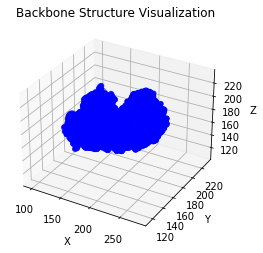

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_pdb_coordinates(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                x, y, z = map(float, line[30:54].split())
                coordinates.append([x, y, z])
    return np.array(coordinates)

def plot_structure(coordinates):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot for atoms
    ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='blue', marker='o')
    
    # Line plot to connect atoms, representing the backbone
    ax.plot(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], color='gray', linewidth=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Backbone Structure Visualization')
    plt.show()

# Usage example with your backbone PDB file
pdb_file_path = './data/backbones/6K9K_backbone.pdb' 
coordinates = read_pdb_coordinates(pdb_file_path)
plot_structure(coordinates)

In [92]:
import py3Dmol
def visualize_pdb_with_py3dmol(file_path):
    with open(file_path, 'r') as file:
        pdb_content = file.read()
    
    view = py3Dmol.view(width=800, height=400)  # Adjust the size as needed
    view.addModel(pdb_content, 'pdb')
    view.zoomTo()
    return view

# Use the function to visualize your PDB structure
pdb_file_path = './data/backbones/6K9K_backbone.pdb'
view = visualize_pdb_with_py3dmol(pdb_file_path)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [93]:
import py3Dmol
def visualize_pdb_with_py3dmol(file_path):
    with open(file_path, 'r') as file:
        pdb_content = file.read()
    
    view = py3Dmol.view(width=800, height=400)  # Adjust the size as needed
    view.addModel(pdb_content, 'pdb')
    
    # Customize the appearance here
    view.setStyle({'cartoon': {'color': 'spectrum'}})  # Cartoon style with spectrum coloring
    view.zoomTo()
    return view

# Use the function to visualize your PDB structure
pdb_file_path = './data/all_atoms/6K9K_allAtom.pdb'
view = visualize_pdb_with_py3dmol(pdb_file_path)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [86]:
pdb_id = '6K9K'
view = py3Dmol.view(query='pdb:6K9K')
view.setStyle({'cartoon': {'color':'spectrum'}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol